# Regression Analysis
Predicting another variable on the basis of other variables

In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [39]:
df = pd.read_csv('cleaned_car_data.csv')
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Low
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Low


# Simple Linear Regression
This helps us understand the relationship between two variables
- Predictor/independent variable (X)
- Response/dependent variable (Y)

Yhat = a + bX
- a and b can be determined using sklearn

how highway-mpg (independent) can help us predict car price (dependent)

In [40]:
x = df[['highway-mpg']]
y = df['price']  # y value should not be in dataframe like x because you would want the predicted outcome to be one array

Creating a linear regression object and fitting the model using the X and Y variables

In [41]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

Printing out prediction result (X is the indepdent variable and Y is the outcome)

In [42]:
y_predict=lm.predict(x)
y_predict[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

We can also figure out `a` (regression line intercept) and `b` (slope of the regression line)

In [19]:
lm.intercept_

38423.305858157386

In [20]:
lm.coef_

array([-821.73337832])

$$
Yhat = a + b  X
$$
We get the final linear model of
- <b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>

# Regression Plot
- It is used to visualize simple linear regression

Visualing highway-mpg as predictor (independent variable) of price

In [21]:
import seaborn as sns
%matplotlib inline 

(0.0, 48183.869595017175)

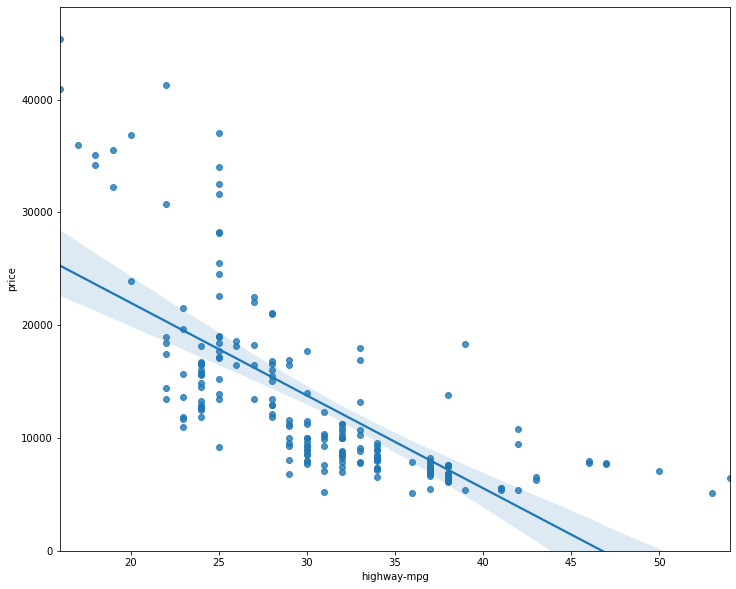

In [22]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,) # makes the lowest y point to 0 

As you can see from the graph, price is negarively correlated to highway-mpg

# Residual Plot
Residual plot measures the variance between my linear model and the actual data point

This plot shows if my linear model is appropriate 
- Good way to visualize the variance of the data
- Residual = difference between actual value and predicted value.


If the points are <b>randomly spread out around the x-axis</b> then the model is appropriate because it means that the variance is constant


C:\Users\bkim5\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


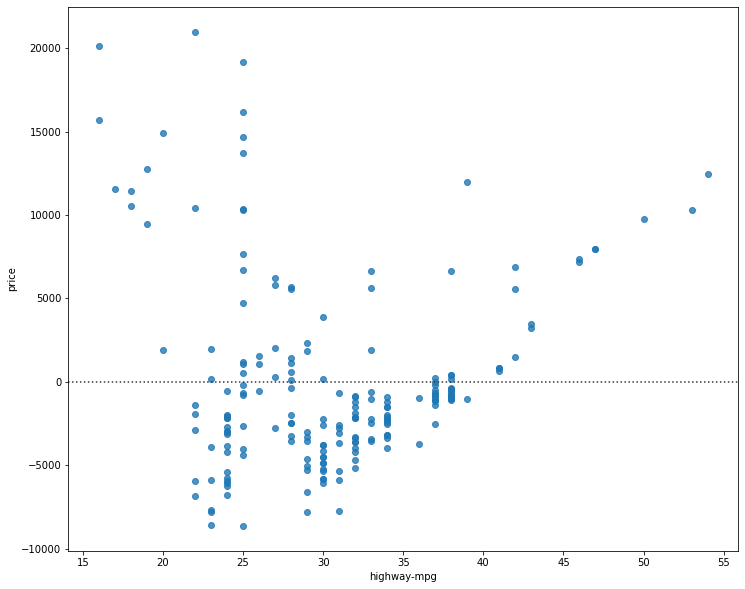

In [23]:
width = 12
height = 10
plt.figure(figsize=(width, height))
x = df[['highway-mpg']]
y = df[['price']]
sns.residplot(x, y)
plt.show()

This plot tells us that residual points are not randomly spread around x-axis so, it is leading us to believe that non-linear model is more appropriate 

# Distribution plot
- Can visually see the distribution of the predicted values and actual values.
- It is also used to visualize a model for Multiple Linear Regression

In [50]:
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

In [51]:
lm.fit(z, y)

LinearRegression()

In [52]:
y_predict=lm.predict(z)
y_predict[0:5]

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344])

C:\Users\bkim5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\bkim5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


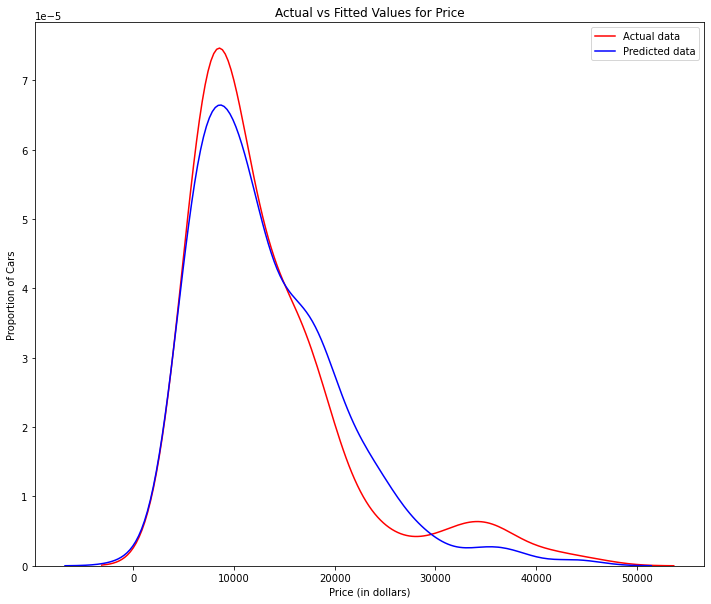

In [53]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label='Actual data') #actual price data
sns.distplot(y_predict, hist=False, color="b", ax=ax1, label = 'Predicted data') #predicted price data
plt.legend()

# hist=False gets rid of bar histogramf
# ax=ax1 combines the two graphs into one

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the predicted values are close to actual values since they overlap a bit but not accurate when prices increase

# Polynomial Regression
- Useful for describing curvilinear relationship.


Different orders of polynomial regression:
<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$



<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$

Creating a function to plot polynomial function

In [54]:
df['highway-mpg'].min()

16

In [55]:
df['highway-mpg'].max()

54

In [56]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    # provides 100 test points starting from i_var min and i_var max
    x_new = np.linspace(independent_variable.min(), independent_variable.max(), 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new)
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Let's fit the polynomial using the function in numpy <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.

In [57]:
x = df['highway-mpg']
y = df['price']
function = np.polyfit(x, y, 3)
model = np.poly1d(function)
print(model,'\n')
print(function)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05 

[-1.55663829e+00  2.04754306e+02 -8.96543312e+03  1.37923594e+05]


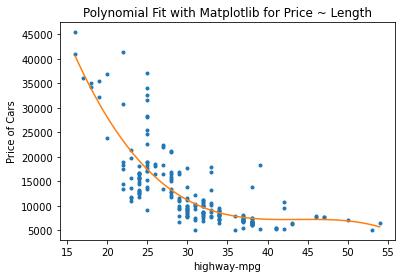

In [58]:
PlotPolly(model, x, y, 'highway-mpg')

This polynomial model performs better than the linear model because the polynomial function 'hits' more data points

# Determining the accuracy of our model
- R^2: Measures how close each data is to the regression line. It tells us how well our regression model predicts actual value
    - Higher the R^2 value, more accurate our model is
- MSE: It measures residual error, the difference between actual value and predicted value then squaring.
    - Lesser the value, more accurate/efficient our model is
    - Large MSE means that my data values are dispersed widely around the mean value

Calculating the R^2 of highway-mpg fit

In [59]:
x = df[['highway-mpg']]
y = df['price']
lm = LinearRegression()
lm.fit(x, y)
print('The R-square is: ', lm.score(x, y))

The R-square is:  0.4965911884339175


### ~49.659% of the variation of the price is explained by this model

First, we predict the output (y_predict) using the predict method where (x) is the input variable

In [60]:
y_predict=lm.predict(x)
print('The output of the first four predicted value is: ', y_predict[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


After we get our `predicted` result, we now compare with the `actual` result

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
mse = mean_squared_error(y, y_predict)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


### Finding the scores of a polynomial fit

In [63]:
from sklearn.metrics import r2_score

Using our earlier polynomial equation

In [64]:
print(model)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Finding the R^2 value

In [65]:
r_squared = r2_score(y, model(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


Finding the MSE

In [66]:
mean_squared_error(y, model(x))

20474146.426361218

In this case, Polynomial Regression is a better model because of higher R^2 and lower MSE

# Conclusion
In order to create the best model you,
- Visualize different models
- Generate R^2 and MSE values for each fits
- Compare each R^2 and MSE to find the best fit